In [26]:
### Importing the dataset - in the form of batches - using dataloader package - mini batch descent - size =64
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [27]:
import numpy as np

class MLP:
    def __init__(self, input_layer_size=784, first_hidden_layer_size=500, 
                 second_hidden_layer_size=250, third_hidden_layer_size=100, 
                 output_layer_size=10, learning_rate=0.01, batch_size=64):
        
        self.input_layer_size = input_layer_size
        self.first_hidden_layer_size = first_hidden_layer_size
        self.second_hidden_layer_size = second_hidden_layer_size
        self.third_hidden_layer_size = third_hidden_layer_size
        self.output_layer_size = output_layer_size
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        self.W1 = np.random.uniform(-np.sqrt(6/(self.input_layer_size+self.first_hidden_layer_size)), np.sqrt(6/(self.input_layer_size+self.first_hidden_layer_size)), (self.input_layer_size, self.first_hidden_layer_size))
        self.b1 = np.zeros((1, self.first_hidden_layer_size))
        self.W2 = np.random.uniform(-np.sqrt(6/(self.first_hidden_layer_size+self.second_hidden_layer_size)), 
                                    np.sqrt(6/(self.first_hidden_layer_size+self.second_hidden_layer_size)), 
                                    (self.first_hidden_layer_size, self.second_hidden_layer_size))
        self.b2 = np.zeros((1, self.second_hidden_layer_size))
        
        self.W3 = np.random.uniform(-np.sqrt(6/(self.second_hidden_layer_size+self.third_hidden_layer_size)), 
                                    np.sqrt(6/(self.second_hidden_layer_size+self.third_hidden_layer_size)), 
                                    (self.second_hidden_layer_size, self.third_hidden_layer_size))
        self.b3 = np.zeros((1, self.third_hidden_layer_size))
        
        self.W4 = np.random.uniform(-np.sqrt(6/(self.third_hidden_layer_size+self.output_layer_size)), 
                                    np.sqrt(6/(self.third_hidden_layer_size+self.output_layer_size)), 
                                    (self.third_hidden_layer_size, self.output_layer_size))
        self.b4 = np.zeros((1, self.output_layer_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.Activation_1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.Activation_1, self.W2) + self.b2
        self.Activation_2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.Activation_2, self.W3) + self.b3
        self.Activation_3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.Activation_3, self.W4) + self.b4
        self.Activation_4 = self.softmax(self.z4)
        return self.Activation_4
    


    def backward(self, X, Y):
        errorz4 = self.Activation_4 - Y
        partial_derivative_w_4 = np.dot(self.Activation_3.T, errorz4) / self.batch_size
        partial_derivative_b_4 = np.sum(errorz4, axis=0, keepdims=True) / self.batch_size

        errorz3 = np.dot(errorz4, self.W4.T) * self.Activation_3 * (1 - self.Activation_3)
        partial_derivative_w_3 = np.dot(self.Activation_2.T, errorz3) / self.batch_size
        partial_derivative_b_3 = np.sum(errorz3, axis=0, keepdims=True) / self.batch_size
        
        errorz2 = np.dot(errorz3, self.W3.T) * self.Activation_2 * (1 - self.Activation_2)
        partial_derivative_w_2 = np.dot(self.Activation_1.T, errorz2) / self.batch_size
        partial_derivative_b_2 = np.sum(errorz2, axis=0, keepdims=True) / self.batch_size
        
        errorz1 = np.dot(errorz2, self.W2.T) * self.Activation_1 * (1 - self.Activation_1)
        partial_derivative_w_1 = np.dot(X.T, errorz1) / self.batch_size
        partial_derivative_b_1 = np.sum(errorz1, axis=0, keepdims=True) / self.batch_size
        

        self.W4 -= self.learning_rate * partial_derivative_w_4
        self.b4 -= self.learning_rate * partial_derivative_b_4
        self.W3 -= self.learning_rate * partial_derivative_w_3
        self.b3 -= self.learning_rate * partial_derivative_b_3
        self.W2 -= self.learning_rate * partial_derivative_w_2
        self.b2 -= self.learning_rate * partial_derivative_b_2
        self.W1 -= self.learning_rate * partial_derivative_w_1
        self.b1 -= self.learning_rate * partial_derivative_b_1

        
    def entropy_class_loss(self, Y, Y_hat):
        
        loss = -np.sum(Y * np.log(Y_hat)) / self.batch_size
        return loss


In [28]:
def entropy_class_loss(self, Y, Y_hat):
        loss = -np.sum(Y * np.log(Y_hat)) / self.batch_size
        return loss

 Current Iteration 200, Training Loss: 2.2930, Test Loss: 2.2907
 Current Iteration 400, Training Loss: 2.2854, Test Loss: 2.2829
 Current Iteration 600, Training Loss: 2.2774, Test Loss: 2.2749
 Current Iteration 800, Training Loss: 2.2687, Test Loss: 2.2662
Epoch 1/15 
 Current Iteration 1000, Training Loss: 2.2585, Test Loss: 2.2553
 Current Iteration 1200, Training Loss: 2.2476, Test Loss: 2.2440
 Current Iteration 1400, Training Loss: 2.2349, Test Loss: 2.2313
 Current Iteration 1600, Training Loss: 2.2204, Test Loss: 2.2164
 Current Iteration 1800, Training Loss: 2.2029, Test Loss: 2.1987
Epoch 2/15 
 Current Iteration 2000, Training Loss: 2.1814, Test Loss: 2.1768
 Current Iteration 2200, Training Loss: 2.1540, Test Loss: 2.1490
 Current Iteration 2400, Training Loss: 2.1200, Test Loss: 2.1140
 Current Iteration 2600, Training Loss: 2.0781, Test Loss: 2.0710
 Current Iteration 2800, Training Loss: 2.0251, Test Loss: 2.0179
Epoch 3/15 
 Current Iteration 3000, Training Loss: 1.96

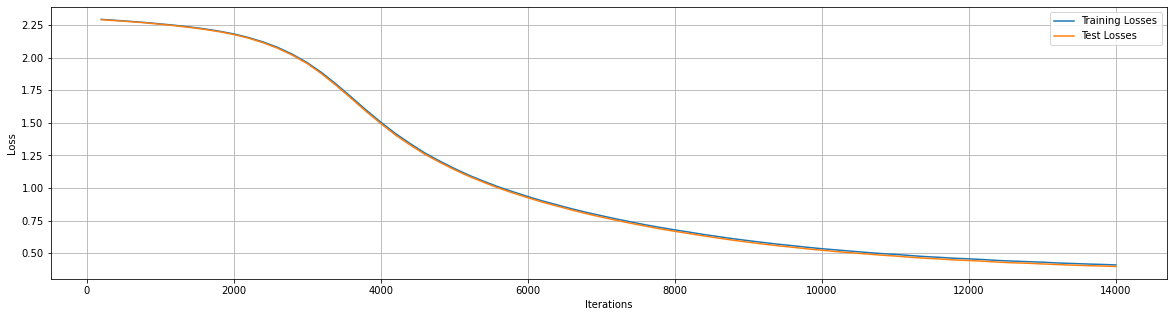

In [29]:


def train(model, train_loader, test_loader, epochs, plot_interval=200):
    training_loss_list = []
    test_loss_list = []
    iteration_counts = []
    
    current_iteration = 0
    
    for epoch in range(epochs):
        for batch_idx, (images, labels) in enumerate(train_loader):
            X = images.view(-1, 28*28).numpy()
            Y = np.eye(10)[labels]
            Y_hat = model.forward(X)
            loss = model.entropy_class_loss(Y, Y_hat)
            model.backward(X, Y)
            current_iteration += 1
            if current_iteration % plot_interval == 0:
                iteration_counts.append(current_iteration)
                total_train_loss = 0
                total_train_samples = 0
                for train_images, train_labels in train_loader:
                    X_train = train_images.view(-1, 28*28).numpy()
                    Y_train = np.eye(10)[train_labels]
                    Y_train_hat = model.forward(X_train)
                    total_train_loss += model.entropy_class_loss(Y_train, Y_train_hat) * X_train.shape[0]
                    total_train_samples += X_train.shape[0]
                avg_train_loss = total_train_loss / total_train_samples
                training_loss_list.append(avg_train_loss)

                total_test_loss = 0
                total_test_samples = 0
                for test_images, test_labels in test_loader:
                    X_test = test_images.view(-1, 28*28).numpy()
                    Y_test = np.eye(10)[test_labels]
                    Y_test_hat = model.forward(X_test)
                    total_test_loss += model.entropy_class_loss(Y_test, Y_test_hat) * X_test.shape[0]
                    total_test_samples += X_test.shape[0]
                avg_test_loss = total_test_loss / total_test_samples
                test_loss_list.append(avg_test_loss)
                
                print(f' Current Iteration {current_iteration}, Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
        
        print(f'Epoch {epoch+1}/{epochs} ')
    
    plt.figure(figsize=(20, 5))
    plt.plot(iteration_counts, training_loss_list, label='Training Losses')
    plt.plot(iteration_counts, test_loss_list, label='Test Losses')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
   
    plt.legend()
    plt.grid(True)
    plt.show()

model = MLP()
train(model, train_loader, test_loader, epochs=15)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
def final_test(model, test_loader):
    all_preds = []
    all_labels = []
    for images, labels in test_loader:
        X = images.view(-1, 28*28).numpy()  
        Y_hat = model.forward(X)
        preds = np.argmax(Y_hat, axis=1)  
        all_preds.append(preds)
        all_labels.append(labels.numpy())  
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Final Test Accuracy: {accuracy * 100:.2f}%')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print('Confusion Matrix:\n', conf_matrix)
    plt.figure(figsize=(20, 17))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted ')
    plt.ylabel('True ')
    plt.title('Confusion Matrix')
    plt.show()


Final Test Accuracy: 88.48%
Confusion Matrix:
 [[5690    0   39   19   12   71   36   15   40    1]
 [   0 6523   39   21    3   35    4   20   88    9]
 [  75  111 5062  130  114   18  204   81  147   16]
 [  22   53  175 5227    2  285   19  135  175   38]
 [   9   39   38    1 5144    7  101    8   32  463]
 [ 103   80   63  318   50 4328  176   62  161   80]
 [  58   35   98    1   82   98 5521    0   25    0]
 [  28   77   76   17   41   17    0 5681   16  312]
 [  25  182   94  224   27  201   77   18 4858  145]
 [  50   33   31   79  250   38    7  364   46 5051]]


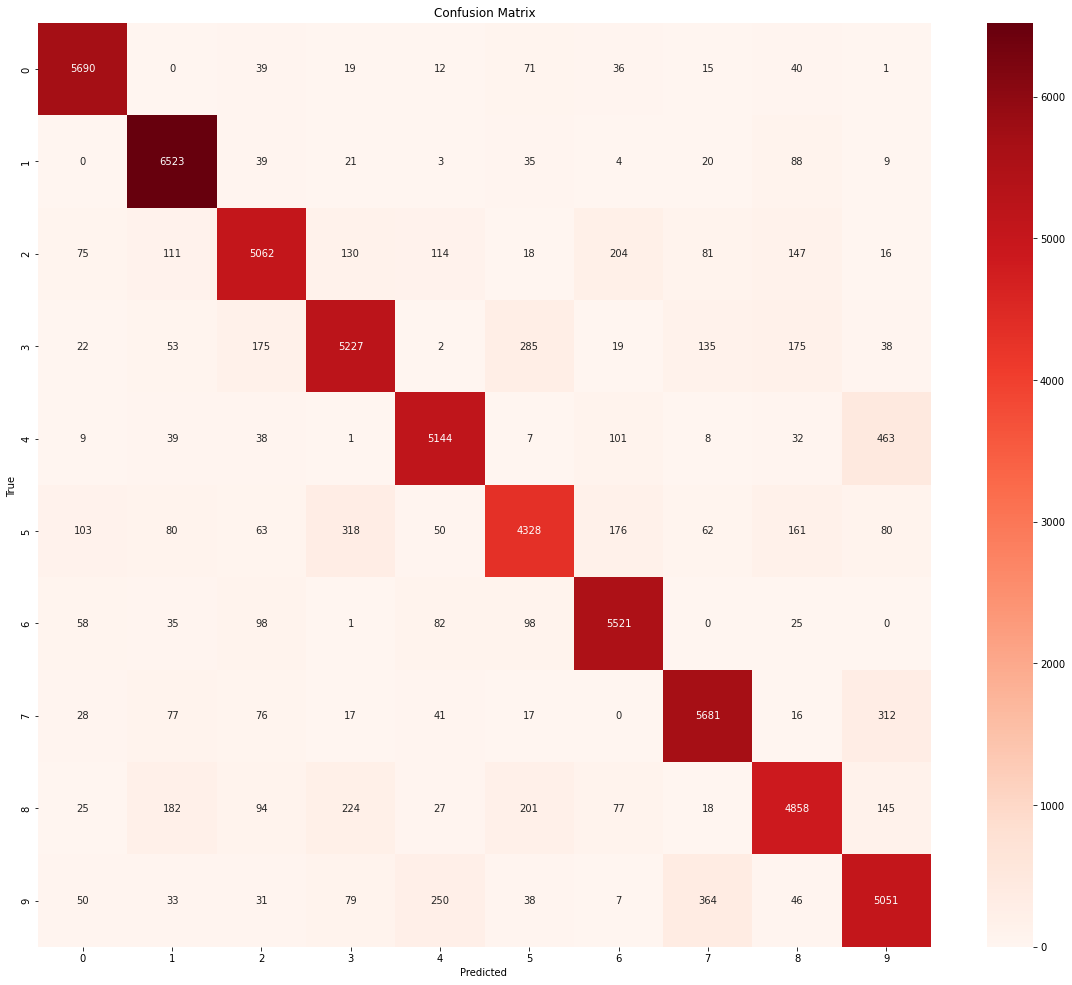

In [31]:
final_test(model,train_loader)

Final Test Accuracy: 88.81%
Confusion Matrix:
 [[ 955    0    4    1    0    9    9    1    1    0]
 [   0 1102    1    6    0    2    3    1   20    0]
 [  15   15  890   17   17    3   22   11   33    9]
 [   4    1   26  894    1   36    1   23   19    5]
 [   1    5    6    0  877    2   17    0    4   70]
 [  20    5   10   65   12  702   27   12   29   10]
 [  21    4   12    0   19   18  883    0    1    0]
 [   6   16   27    3    5    1    0  918    6   46]
 [   5   12   13   41   14   41   19    6  800   23]
 [  14    8    5    9   51   11    0   44    7  860]]


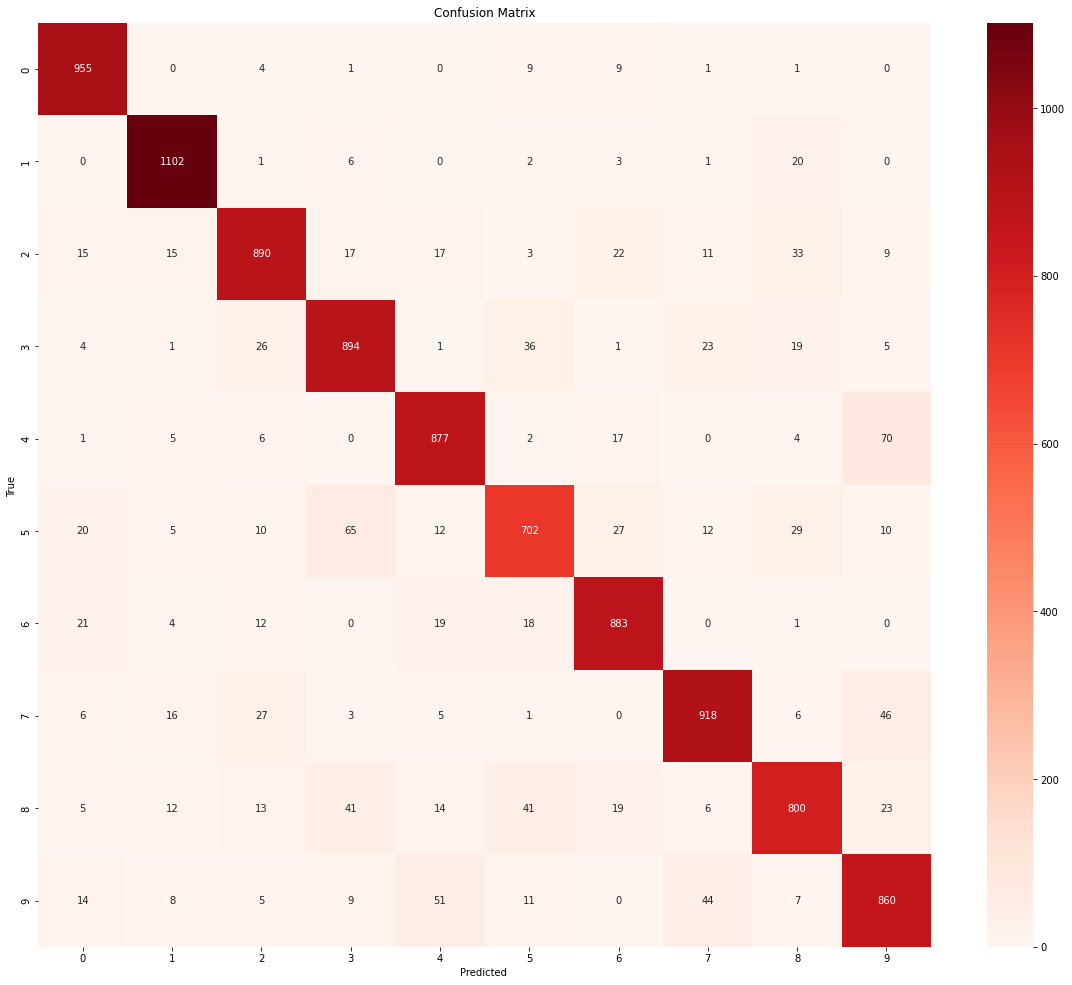

In [32]:

final_test(model, test_loader)